##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [2]:
def reg_lin(filename, x_name, y_name):
    
    data = pd.read_csv(filename, sep=',')
    print(data.describe())
    X = data[x_name]
    y = data[y_name]
    
    plt.grid(zorder=0)
    plt.scatter(X, y, color='black', zorder=3)
    plt.xlabel(x_name, fontsize=13)
    plt.ylabel(y_name, fontsize=13)
    plt.title('Data graph', fontsize=13)
    plt.show()

    X = data[x_name].values.reshape(-1,1)
    y = data[y_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, test_size = 0.7, random_state = 100)

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    
    d = {'y_pred': y_pred, 'y_test': y_test}
    df = pd.DataFrame(data=d)
    df.set_axis(list(range(1,len(y_pred)+1)), axis=0, inplace=True)
    print('\n{0}\n'.format(df))

    reg_coef = regressor.coef_
    reg_inter = regressor.intercept_
    score = regressor.score(X_test, y_test)
    print('Coef: {0}'.format(reg_coef))
    print('Intercept: {0}'.format(reg_inter))

    plt.grid(zorder=0)
    plt.scatter(X_test, y_test,  color='black', zorder=3)
    plt.plot(X_test, y_pred, color='blue', linewidth=3, zorder=3)
    plt.xlabel(x_name, fontsize=13)
    plt.ylabel(y_name, fontsize=13)
    plt.title('Result', fontsize=13)
    plt.show()

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print('Accuracy: {0}%\n'.format(abs(round(100*score,1))))
    print('Mean Absolute Error: {0}'.format(round(np.mean(mae),2)))
    print('Mean Squared Error: {0}'.format(round(np.mean(mse),2)))
    print('Root Mean Squared Error: {0}'.format(round(np.mean(rmse),2)))

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


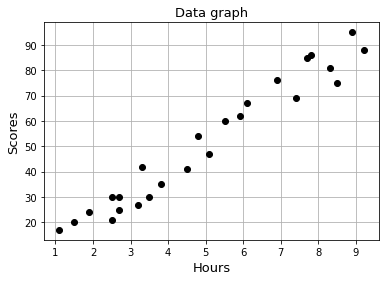


       y_pred  y_test
1   28.626193      25
2   39.438579      35
3   34.523858      42
4   60.080406      62
5   16.830863      20
6   74.824569      69
7   69.909848      76
8   49.268020      54
9   92.517563      88
10  46.319188      41
11  36.489746      30
12  78.756345      86
13  26.660305      21
14  52.216853      47
15  28.626193      30
16  12.899086      17
17  20.762640      24
18  62.046294      67

Coef: [9.82944162]
Intercept: 2.0867005076142533


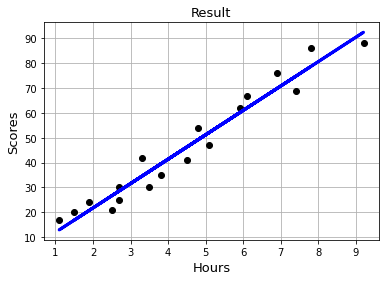

Accuracy: 95.1%

Mean Absolute Error: 4.74
Mean Squared Error: 25.12
Root Mean Squared Error: 5.01


In [3]:
reg_lin('SCORES.csv', 'Hours', 'Scores') 

             Age         SBP
count  19.000000   19.000000
mean   64.947368  129.421053
std     7.214751   13.454928
min    54.000000  111.000000
25%    60.500000  119.000000
50%    63.000000  129.000000
75%    68.500000  137.000000
max    79.000000  163.000000


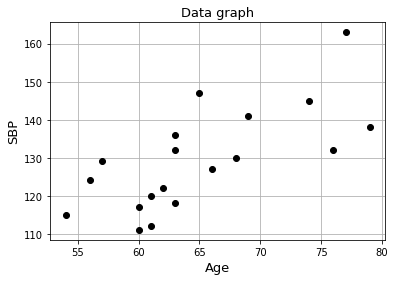


        y_pred  y_test
1   164.155854     138
2   128.996044     112
3   119.229430     124
4   127.042722     111
5   136.809335     147
6   128.996044     120
7   130.949367     122
8   138.762658     127
9   115.322785     115
10  158.295886     132
11  142.669304     130
12  154.389241     145
13  132.902690     132
14  132.902690     118

Coef: [1.95332278]
Intercept: 9.84335443037979


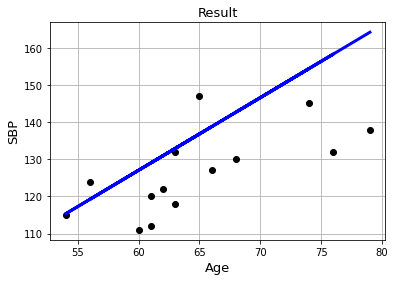

Accuracy: 66.7%

Mean Absolute Error: 12.02
Mean Squared Error: 201.39
Root Mean Squared Error: 14.19


In [4]:
reg_lin('SBP.csv', 'Age', 'SBP') 

### Zadanie 1 - wnioski

#### Wnioski dla 'SCORES.csv'
#### Wskaźniki coef_ oraz intercept_. Czym one są i do czego służą?
Wskaźniki te są współczynnikami 𝛽 w równaniu struktury modelu. Współczynnik intercept oznacza wyraz wolny, natomiast coef jest listą pozostałych współczynników ważonych. Są one potrzebne do wyznaczenia równania dopasowanej funkcji liniowej.
W przypadku wartości uzyskanych dla pliku SCORES.csv (coef = 9.83, intercept = 2.09) otrzymany model pasuje do linii:
y = 9.83 * 'Hours' + 2.09


#### Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
Wynik predykcji dla części testowej X (y_pred) dość dobrze pokrywa się z posiadanymi danymi (y_test). Wartości predykcji te nie są dokładnie takie same jak dane, natomiast są do siebie zbliżone, poprawnie reagując wzrostami i spadkami dla poszczególnych wartości X.


#### Walidacja uzyskanych predykcji
MAE (mean absolute error / średni błąd bezwzględny) -  informuje o ile średnio w okresie prognoz, będzie wynosić odchylenie od wartości rzeczywistej. Określa jakim błędem miarowym jest obarczona prognoza.

MSE (Mean Squared Error / błąd średniokwadratowy) - oznacza średnią różnicę kwadratów odchyleń.

RMSE (Root Mean Squared Error / pierwiastek błędu średniokwadratowego) - jest pierwiastkiem błędu średniokwadratowego. Określa jak prognozy średnio różnią się od rzeczywistych wartości zmiennych. Jest wyrażony w tej samej jednostce co zmienna zależna.

- średni błąd bezwzględny (Mean Absolute Error) wynosi 4.74
- błąd średniokwadratowy (Mean Squared Error) wynosi 25.12
- pierwiastek błędu średniokwadratowego (Root Mean Squared Error) wynosi 5.01

Wartość średnia zmiennej zależnej:  51.48

Walidacja uzyskanych predykcji potwierdza niski stopień błędu wykonanej regresji liniowej.

#### Wnioski dla 'SBP.csv'
#### Czy uzyskane wyniki z modelu 'SBP.csv' są równie zadowalające?
W tym wypadku wyniki są nieco gorsze od poprzedniego modelu. Dokładność spadła z 95.1% (dla poprzedniego modelu) do 66.7%. 

Walidacja poniższych wskaźników również potwierdza większe błędy:
- średni błąd bezwzględny (Mean Absolute Error) wynosi 12.02
- błąd średniokwadratowy (Mean Squared Error) wynosi 201.39
- pierwiastek błędu średniokwadratowego (Root Mean Squared Error) wynosi 14.19 

Wartość średnia zmiennej zależnej:  129.42

Wyniki z modelu można natomiast w dalszym ciągu uznać za stosunkowo satysfakcjonujące.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [5]:
def plt_scatter(X,name,y):
    plt.grid(zorder=0)
    plt.scatter(X[name], y, color='black', zorder=3)
    plt.ylabel('Zuzycie_paliwa', fontsize=13)
    plt.xlabel(name, fontsize=13)
    plt.title('Data graph', fontsize=13)
    plt.show() 

def plt_scatter_line(X_test, name, y_test, y_pred):
    plt.grid(zorder=0)
    plt.scatter(X_test[name], y_test, color='black', zorder=3)
    d = {'X_test': X_test[name], 'y_pred': y_pred}
    df = pd.DataFrame(data=d)
    X_y_sort = df.sort_values(by='X_test')
    plt.plot(X_y_sort['X_test'], X_y_sort['y_pred'], color='blue', linewidth=3, zorder=3)
    plt.ylabel('Zuzycie_paliwa', fontsize=13)
    plt.xlabel(name, fontsize=13)
    plt.title('Result', fontsize=13)
    plt.show() 

       Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
count         48.000000        48.000000              48.000000   
mean           7.668333      4241.833333            5565.416667   
std            0.950770       573.623768            3491.507166   
min            5.000000      3063.000000             431.000000   
25%            7.000000      3739.000000            3110.250000   
50%            7.500000      4298.000000            4735.500000   
75%            8.125000      4578.750000            7156.000000   
max           10.000000      5342.000000           17782.000000   

       Procent_ludnosci_z_prawem_jazdy  Zuzycie_paliwa  
count                        48.000000       48.000000  
mean                          0.570333      576.770833  
std                           0.055470      111.885816  
min                           0.451000      344.000000  
25%                           0.529750      509.500000  
50%                           0.564500      568.500000

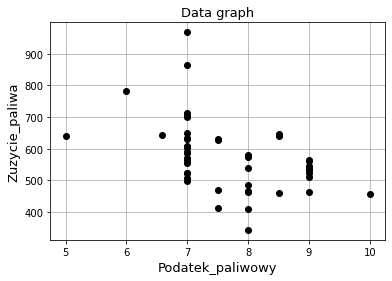

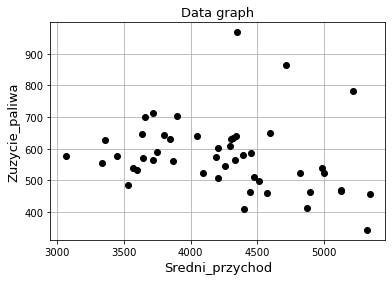

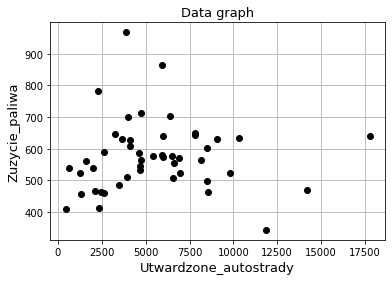

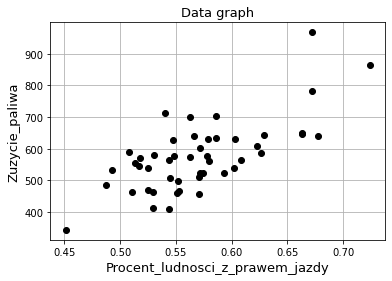


        y_pred  y_test
1   224.516550     344
2   581.555808     574
3   724.662017     577
4   621.204489     577
5   651.406304     699
6   584.863355     524
7   451.284954     457
8   711.873032     587
9   900.624965     865
10  573.143114     554
11  541.406096     541
12  414.381707     471
13  653.872361     640
14  594.807534     714
15  522.122476     591
16  788.971654     644
17  636.810162     628
18  468.009912     467
19  553.492695     510
20  778.684652     649
21  568.170911     566
22  807.904740     640
23  589.656002     540
24  557.710496     508
25  593.532750     524
26  519.640515     410
27  561.535813     525
28  846.590359     648
29  380.715227     464
30  468.040134     534
31  543.026067     498
32  658.703628     631
33  616.892491     603
34  676.091243     632



                                 Coefficient
Podatek_paliwowy                  -17.558611
Sredni_przychod                    -0.097991
Utwardzone_autostrady              -0.000081
Procent_lud

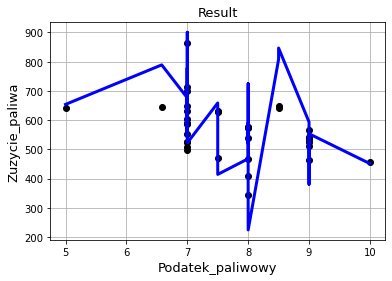

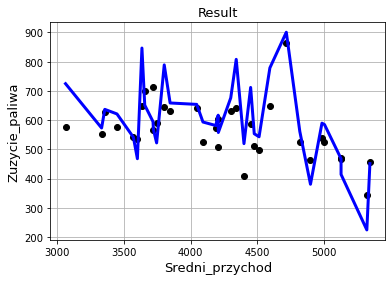

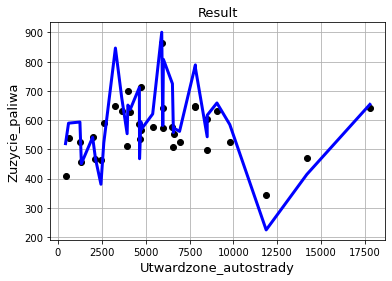

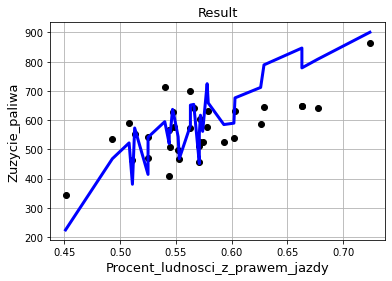

Accuracy: 25.2%

Mean Absolute Error: 63.63
Mean Squared Error: 6778.18
Root Mean Squared Error: 82.33


In [6]:
data = pd.read_csv('PETROL.csv', sep=',')
print(data.describe())

y = data.pop('Zuzycie_paliwa')
X = data

plt_scatter(X,'Podatek_paliwowy',y)
plt_scatter(X,'Sredni_przychod',y)
plt_scatter(X,'Utwardzone_autostrady',y)
plt_scatter(X,'Procent_ludnosci_z_prawem_jazdy',y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, test_size = 0.7, random_state = 100)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

d = {'y_pred': y_pred, 'y_test': y_test}
df = pd.DataFrame(data=d)
df.set_axis(list(range(1,len(y_pred)+1)), axis=0, inplace=True)
print('\n{0}\n'.format(df))

reg_inter = regressor.intercept_
score = regressor.score(X_test, y_test)

print('\n')
df_c = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(df_c)
print('\nIntercept: {0}\n'.format(reg_inter))

plt_scatter_line(X_test,'Podatek_paliwowy', y_test, y_pred,)
plt_scatter_line(X_test,'Sredni_przychod', y_test, y_pred)
plt_scatter_line(X_test,'Utwardzone_autostrady', y_test, y_pred)
plt_scatter_line(X_test,'Procent_ludnosci_z_prawem_jazdy', y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Accuracy: {0}%\n'.format(abs(round(100*score,1))))
print('Mean Absolute Error: {0}'.format(round(np.mean(mae),2)))
print('Mean Squared Error: {0}'.format(round(np.mean(mse),2)))
print('Root Mean Squared Error: {0}'.format(round(np.mean(rmse),2)))


### Zadanie 2 - wnioski

Dla tego modelu wyniki są dużo gorsze w porównaniu do poprzednich przykładów. Dokładność spadła do 25.2%.

Walidacja uzyskanych predykcji pokazuje następujące błędy:

- średni błąd bezwzględny (Mean Absolute Error) wynosi 63.63
- błąd średniokwadratowy (Mean Squared Error) wynosi 6778.18
- pierwiastek błędu średniokwadratowego (Root Mean Squared Error) wynosi 82.33 

Wartość średnia zmiennej zależnej: 576.77

Model pozwala więc w dużo niższym stopniu poprawności na przewidzenie wartości zmienniej. Najprawdopodobniej jest to związane z tym, że zmienna zależna oraz predyktory nie do końca mają na siebie istotny wpływ w rzeczywistości. Inne czynniki mogą mieć dużo większy wpływ na ich wartości, co może skutkować pewną losowością w badanym modelu.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

def get_data(data, col_numeric, col_cat, scaler):
    X_num = scaler.transform(data[col_numeric])
    X_cat = data[col_cat].to_numpy()
    X = np.hstack((X_cat, X_num))
    y = data['num       ']
    return X, y

Data details after tidy:
              age         sex          cp     oldpeak  num       
count  261.000000  261.000000  261.000000  261.000000  261.000000
mean    47.770115    0.735632    3.003831    0.612261    0.375479
std      7.842244    0.441843    0.970718    0.931914    0.485177
min     28.000000    0.000000    1.000000    0.000000    0.000000
25%     42.000000    0.000000    2.000000    0.000000    0.000000
50%     49.000000    1.000000    3.000000    0.000000    0.000000
75%     54.000000    1.000000    4.000000    1.000000    1.000000
max     65.000000    1.000000    4.000000    5.000000    1.000000

Coefficients List:
     variable  coefficient
0   intercept    -4.851120
1        cp_2     1.636988
2        cp_3   -12.078512
3        cp_4     5.590403
4       exang     2.303139
5         fbs    -1.728128
6   restecg_1    -3.532744
7   restecg_2     0.000000
8         sex    -0.054406
9         age     1.856476
10   trestbps    -0.366961
11       chol     1.648226
12    thal

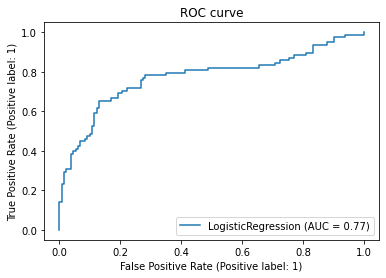

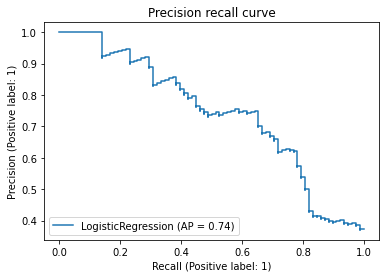

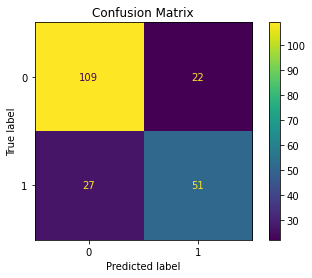

In [8]:
data = pd.read_csv('HEART.csv', sep=',')

data.replace('?', np.nan, inplace=True)
del data['slope']
del data['ca']
del data['thal']
data = data.dropna()
data.set_axis(list(range(0,len(data))), axis=0, inplace=True)

print('Data details after tidy:')
print(data.describe())

data = pd.get_dummies(data=data, columns=['cp', 'restecg'], drop_first=True)

col_numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
col_cat = list(set(data.columns) - set(col_numeric) - {'num       '})
col_cat.sort()

data_train, data_test = train_test_split(data, train_size = 0.2, test_size = 0.8, random_state=10, stratify=data['num       '])

scaler = StandardScaler()
scaler.fit(data_train[col_numeric])
X, y = get_data(data_train, col_numeric, col_cat, scaler)

regressor = LogisticRegression(penalty='none', max_iter=10000)
regressor.fit(X, y)

X_test, y_test = get_data(data_test, col_numeric, col_cat, scaler)

y_pred = regressor.predict(X_test)

print('\nCoefficients List:')
coefficients = np.hstack((regressor.intercept_, regressor.coef_[0]))
df1 = pd.DataFrame(data={'variable': ['intercept'] + col_cat + col_numeric, 'coefficient': coefficients})
print(df1)
print('\nOdchylenia standardowe:')
df2 = pd.DataFrame(data={'variable': col_numeric, 'unit': np.sqrt(scaler.var_)})
print(df2)

print('\n\nClassification Report:')
print(classification_report(y_test, y_pred))

RocCurveDisplay.from_estimator(regressor, X_test, y_test)
plt.title('ROC curve')
plt.show()
PrecisionRecallDisplay.from_estimator(regressor, X_test, y_test)
plt.title('Precision recall curve')
plt.show()
ConfusionMatrixDisplay.from_estimator(regressor, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

### Zadanie 3 - wnioski

Po podziale na zbiór treningowy i testowy dane zostały ustandaryzowane (poprzez skalowanie za pomocą StandardScaler())
Po utworzeniu klasy StandardScaler(), obliczono średnią i odchylenie standardowe do skalowania zmiennych niekategorialnych. Następnie stworzono funkcję, która kolejno wykonywała standaryzację kolumn, przekształcała listę w tablicę NumPy, łączyła obie tablice oraz zwracała potrzebne X, y.

Narysowany wykres krzywej ROC jest graficzną reprezentacją efektywności modelu predykcyjnego poprzez wykreślenie charakterystyki jakościowej klasyfikatorów binarnych powstałych z modelu przy zastosowaniu wielu różnych punktów odcięcia. Klasyfikator teoretycznie idealny reprezentowany jest przez punkt (0,1).

Narysowany wykres krzywej Precision Recall przedstawia jak zmienia się Precision w zależności od Recall. Precision odpowiada za dokładność rozpoznania w obrębie klasy, natomiast recall za rozpoznanie ilości elementów z klasy. Dla klasyfikatora idealnego precision niezależnie od wartości recall powinno wynosić 1.

W tabeli Classification Report istnieje również wartość f1-score. Jest ona średnią harmoniczną dla wartości Precision oraz Recall. Precision i Recall można policzyć dla każdej klasy z osobna i otrzymać dwie wartości f1. Chcąc mieć jedną liczbę dla klasyfikatora binarnego można dokonać uśrednienia dwóch wartości f1. Obliczona wartość to macro average F1.

Narysowana macierz błędu (Confusion Matrix) powstaje z przecięcia klasy prognozowanej i klasy faktycznie zaobserwowanej, co daje 4 przypadki (2 dla zgodności i 2 dla niezgodności prognozy ze stanem faktycznym). Oznaczenia kolejnych pól:
- pole (0,0) - prawdziwie pozytywna: przewidywanie pozytywne, faktycznie zaobserwowana klasa pozytywna 
- pole (0,1) - fałszywie pozytywna: przewidywanie pozytywne, faktycznie zaobserwowana klasa negatywna 
- pole (1,0) - fałszywie negatywna: przewidywanie negatywne, faktycznie zaobserwowana klasa pozytywna 
- pole (1,1) - prawdziwie negatywna: przewidywanie negatywne, faktycznie zaobserwowana klasa negatywna 


Podsumowując, dla badanego modelu wyniki są dosyć zadowalające. Dokładność wyniosła 77%. Większość prognoz była zatem poprawna.
